# 5. K-Means

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [34]:
dataset = pd.read_csv("KMeansData.csv")
dataset[:5]

,hour,score
0,7.33,73
1,3.71,55
2,3.43,55
3,3.06,89
4,3.33,79


In [35]:
X = dataset.iloc[:, :].values # to_numpy()

### 데이터 시각화 (전체 데이터 분포 확인)

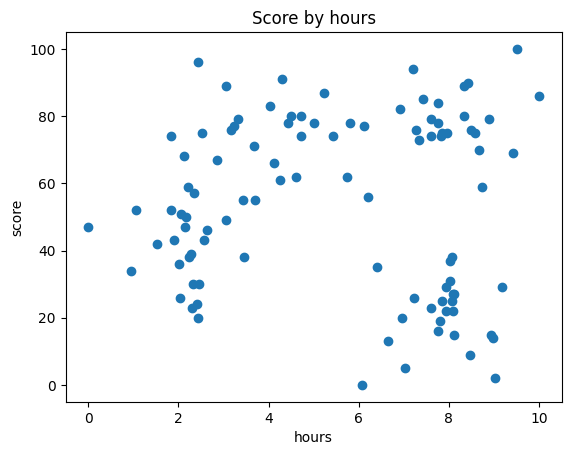

In [36]:
plt.scatter(X[:, 0], X[:, 1]) # x축은 공부시간, y축은 점수
plt.title("Score by hours")
plt.xlabel("hours")
plt.ylabel("score")
plt.show()

### 데이터 시각화 (축 범위 통일)

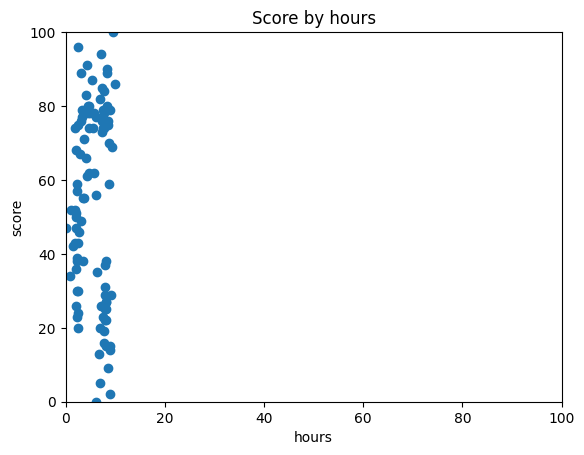

In [37]:
plt.scatter(X[:, 0], X[:, 1]) # x축은 공부시간, y축은 점수
plt.title("Score by hours")
plt.xlabel("hours")
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.ylabel("score")
plt.show()

### 피처 스케일링 (Feature Scaling)

In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X[:5]

array([[ 0.68729921,  0.73538376],
       [-0.66687438,  0.04198891],
       [-0.77161709,  0.04198891],
       [-0.9100271 ,  1.35173473],
       [-0.8090252 ,  0.96651537]])

### 데이터 시각화 (스케일링 된 데이터)

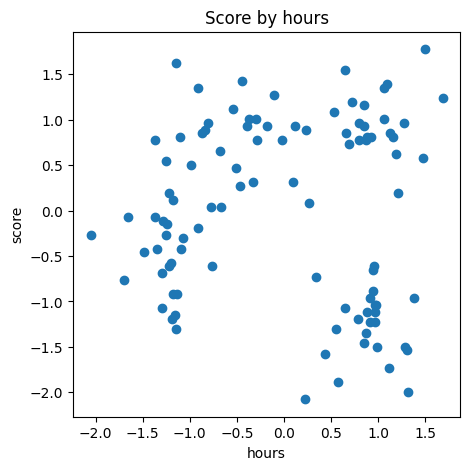

In [39]:
plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1]) # x축은 공부시간, y축은 점수
plt.title("Score by hours")
plt.xlabel("hours")
plt.ylabel("score")
plt.show()

### 최적의 K 값 찾기(엘보우 방식 Elbow Method)

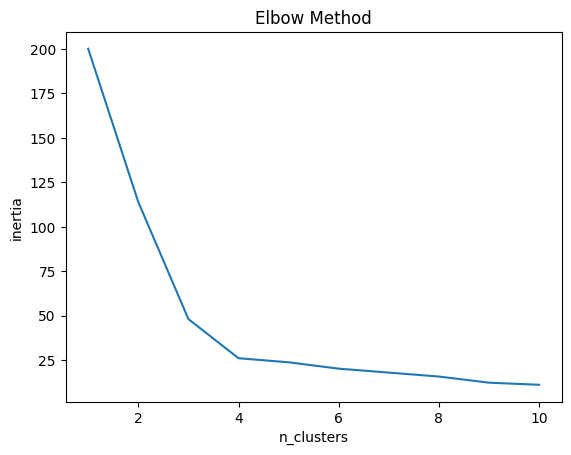

In [40]:
from sklearn.cluster import KMeans
inertia_list = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", n_init="auto", random_state=0)
    kmeans.fit(X)
    inertia_list.append(kmeans.inertia_)

plt.plot(range(1,11), inertia_list)
plt.title("Elbow Method")
plt.xlabel("n_clusters")
plt.ylabel("inertia")
plt.show()

# 기울기가 완만해지는 구간 k = 4

### 최적의 k(4) 으로 KMeans 학습

In [41]:
K = 4 # 최적의 k 값

In [42]:
kmeans = KMeans(n_clusters=K, n_init="auto", random_state=0)
# kmeans.fit(X)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([1, 3, 0, 3, 3, 2, 2, 3, 1, 3, 3, 0, 2, 0, 0, 3, 2, 1, 0, 3, 2, 3,
       0, 2, 1, 1, 0, 0, 0, 0, 2, 2, 0, 3, 1, 1, 0, 3, 3, 3, 0, 2, 1, 0,
       0, 1, 2, 3, 2, 2, 1, 3, 2, 2, 3, 3, 3, 3, 0, 2, 2, 1, 1, 1, 1, 2,
       2, 3, 2, 1, 0, 1, 1, 1, 0, 0, 0, 0, 3, 1, 2, 1, 2, 2, 1, 3, 0, 2,
       1, 0, 3, 2, 3, 1, 0, 1, 1, 3, 2, 0], dtype=int32)

### 데이터 시각화(최적의 K)

In [43]:
centers = kmeans.cluster_centers_ # 클러스터의 중심점 좌표
centers

array([[-1.24939347, -0.48807293],
       [ 0.94107583,  0.93569782],
       [ 0.8837666 , -1.26929779],
       [-0.57544896,  0.82167289]])

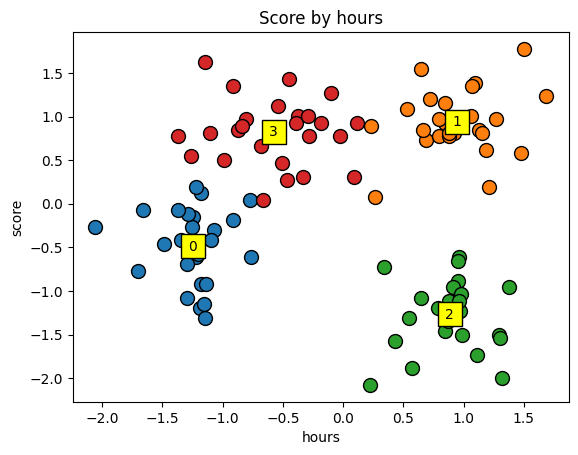

In [44]:
for cluster in range(K):
    plt.scatter(X[y_kmeans == cluster, 0], X[y_kmeans == cluster, 1], s=100, edgecolors="black")
    plt.scatter(centers[cluster, 0], centers[cluster, 1], s=300, edgecolors="black", color="yellow", marker="s")
    plt.text(centers[cluster, 0], centers[cluster, 1], cluster, va="center", ha="center")
plt.title("Score by hours")
plt.xlabel("hours")
plt.ylabel("score")
plt.show()

### 데이터 시각화 (스케일링 원복)

In [45]:
X_org = sc.inverse_transform(X) # feature scaling된 데이터를 다시 복구한다.
X_org

array([[  7.33,  73.  ],
       [  3.71,  55.  ],
       [  3.43,  55.  ],
       [  3.06,  89.  ],
       [  3.33,  79.  ],
       [  7.22,  26.  ],
       [  8.12,  15.  ],
       [  5.74,  62.  ],
       [  8.73,  59.  ],
       [  4.73,  74.  ],
       [  5.  ,  78.  ],
       [  2.63,  46.  ],
       [  7.02,   5.  ],
       [  3.45,  38.  ],
       [  3.06,  49.  ],
       [  4.13,  66.  ],
       [  9.17,  29.  ],
       [  7.61,  74.  ],
       [  0.94,  34.  ],
       [  3.67,  71.  ],
       [  8.47,   9.  ],
       [  2.86,  67.  ],
       [  1.9 ,  43.  ],
       [  6.08,   0.  ],
       [  8.42,  90.  ],
       [  6.12,  77.  ],
       [  0.  ,  47.  ],
       [  2.16,  50.  ],
       [  2.24,  38.  ],
       [  2.31,  23.  ],
       [  8.03,  31.  ],
       [  9.02,   2.  ],
       [  2.43,  20.  ],
       [  4.5 ,  80.  ],
       [  8.66,  70.  ],
       [  7.95,  75.  ],
       [  2.03,  26.  ],
       [  5.43,  74.  ],
       [  4.44,  78.  ],
       [  3.17,  76.  ],


In [46]:
centers_org = sc.inverse_transform(centers)
centers_org

array([[ 2.1528, 41.24  ],
       [ 8.0084, 78.2   ],
       [ 7.8552, 20.96  ],
       [ 3.9544, 75.24  ]])

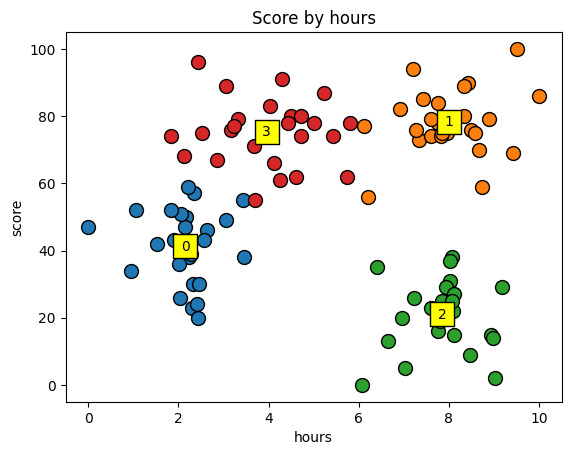

In [47]:
for cluster in range(K):
    plt.scatter(X_org[y_kmeans == cluster, 0], X_org[y_kmeans == cluster, 1], s=100, edgecolors="black")
    plt.scatter(centers_org[cluster, 0], centers_org[cluster, 1], s=300, edgecolors="black", color="yellow", marker="s")
    plt.text(centers_org[cluster, 0], centers_org[cluster, 1], cluster, va="center", ha="center")
plt.title("Score by hours")
plt.xlabel("hours")
plt.ylabel("score")
plt.show()